In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    "dataset/train",   # put Tomato dataset path here
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save Model
model.save("tomato_disease_model.h5")

print("✅ Model training completed and saved as tomato_disease_model.h5")


Found 3601 images belonging to 3 classes.
Found 899 images belonging to 3 classes.


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.6034 - loss: 0.8393 - val_accuracy: 0.8454 - val_loss: 0.3558
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 36s 314ms/step - accuracy: 0.8738 - loss: 0.3099 - val_accuracy: 0.8743 - val_loss: 0.2624
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 318ms/step - accuracy: 0.8926 - loss: 0.2586 - val_accuracy: 0.9166 - val_loss: 0.1927
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 36s 314ms/step - accuracy: 0.9155 - loss: 0.2082 - val_accuracy: 0.9232 - val_loss: 0.1739
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 36s 318ms/step - accuracy: 0.9310 - loss: 0.1766 - val_accuracy: 0.9199 - val_loss: 0.1703
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 36s 315ms/step - accuracy: 0.9499 - loss: 0.1432 - val_accuracy: 0.9333 - val_loss: 0.1796
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 36s 319ms/step - accuracy: 0.9539 - loss: 0.1199 - val_accuracy: 0.9477 - val_loss: 0.1305
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 35s 312ms/step - accuracy: 0.9715 - loss: 0.0

✅ Model training completed and saved as tomato_disease_model.h5


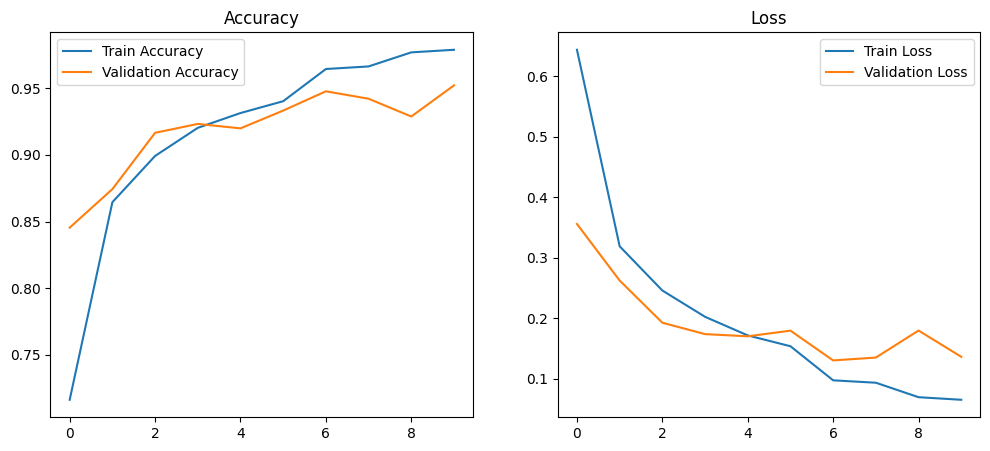

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step


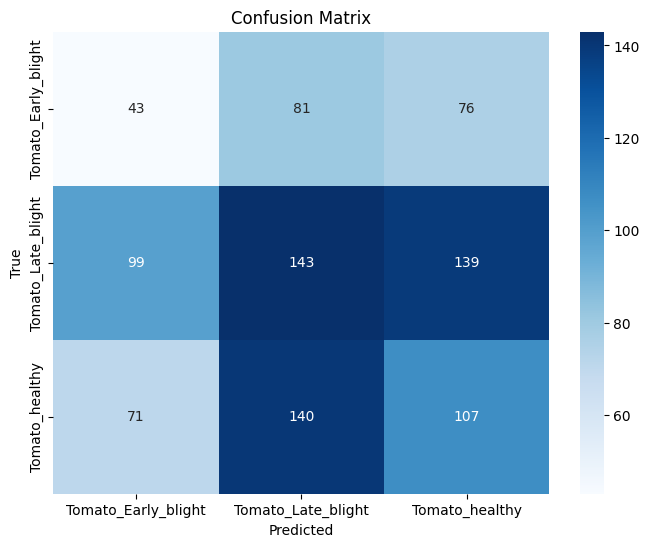

Classification Report:

                     precision    recall  f1-score   support

Tomato_Early_blight       0.20      0.21      0.21       200
 Tomato_Late_blight       0.39      0.38      0.38       381
     Tomato_healthy       0.33      0.34      0.33       318

           accuracy                           0.33       899
          macro avg       0.31      0.31      0.31       899
       weighted avg       0.33      0.33      0.33       899



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Plot Accuracy and Loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

# Confusion Matrix
# Get predictions on validation set
val_preds = model.predict(val_data)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_data.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(val_data.class_indices.keys()),
            yticklabels=list(val_data.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))


In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("tomato_disease_model.h5")

# Load test image
img_path = "dataset/train/early.jpg"  # put your tomato leaf image here
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Map class indices
labels = list(train_data.class_indices.keys())
print("Predicted Class:", labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
Predicted Class: Tomato_Late_blight
